<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [3]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [4]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [5]:
npR

array([[-1.0413, -0.7729, -1.0176, -0.8173, -0.9135],
       [ 0.    , -0.6439, -0.541 , -0.5474, -0.2   ],
       [ 0.    ,  0.    , -0.7835, -0.0146, -0.3796],
       [ 0.    ,  0.    ,  0.    , -0.492 , -0.7394],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.6452]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [6]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m, n], dtype=np.float64)
    R = np.zeros([n, n], dtype=np.float64)

    for j in range(n):
        v_j = A[:, j]

        # Orthogonalization step
        for i in range(j):
            R[i, j] = np.dot(Q[:, i].T, v_j)
            v_j -= R[i, j] * Q[:, i]

        # Normalization step
        R[j, j] = np.linalg.norm(v_j)
        Q[:, j] = v_j / R[j, j]

    return Q, R

In [7]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

False

Check if Q is unitary:

In [8]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [9]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [1]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m, n], dtype=np.float64)
    R = np.zeros([n, n], dtype=np.float64)

    for j in range(n):
        v_j = V[:, j]

        # Orthogonalization step
        for i in range(j):
            R[i, j] = np.dot(Q[:, i].T, v_j)
            v_j -= R[i, j] * Q[:, i]

        # Normalization step
        R[j, j] = np.linalg.norm(v_j)
        Q[:, j] = v_j / R[j, j]
    return Q, R

In [11]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [12]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [14]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [15]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

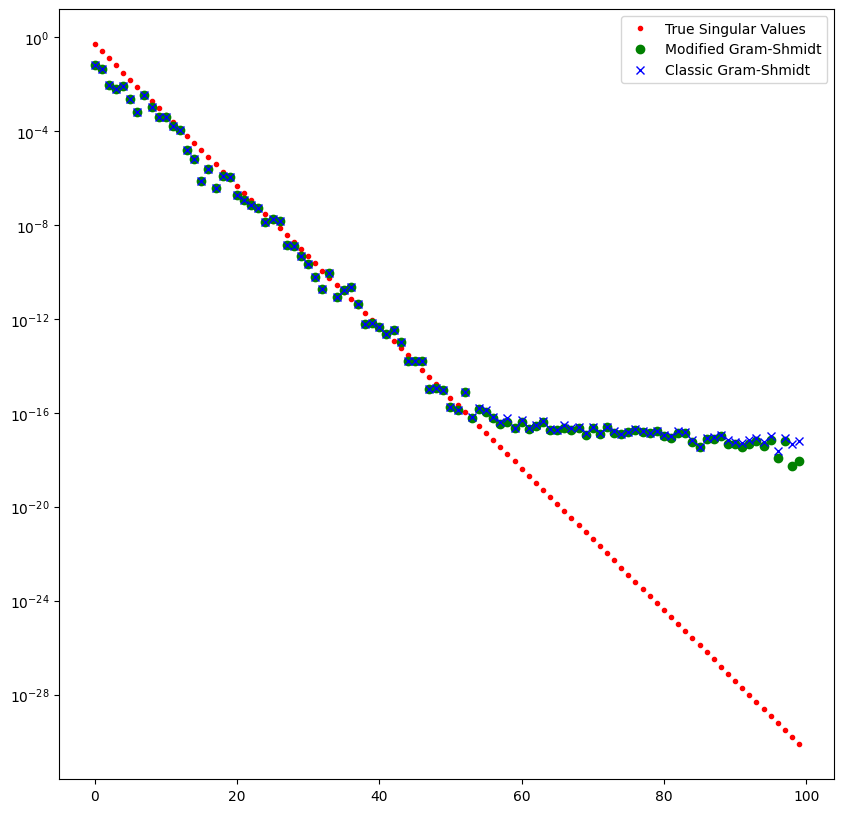

In [16]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [18]:
def qr_algorithm(A, num_iterations):
    m, n = A.shape
    Ak = A.copy()

    for k in range(num_iterations):
        Q, R = np.linalg.qr(Ak)
        Ak = R @ Q

        if k + 1 in [1, 5, 10, 20, 100]:
            eigenvalues = np.diag(Ak)
            print(f"Iteration {k + 1} Eigenvalues: {eigenvalues}")

    return np.diag(Ak)



qr_algorithm_eigenvalues = qr_algorithm(A, 100)
##Your Code ends here

Iteration 1 Eigenvalues: [2. 2. 0. 3.]
Iteration 5 Eigenvalues: [ 2.7929  1.4541 -0.247   3.    ]
Iteration 10 Eigenvalues: [ 2.8019  1.4451 -0.247   3.    ]
Iteration 20 Eigenvalues: [ 2.8019  1.445  -0.247   3.    ]
Iteration 100 Eigenvalues: [ 2.8019  1.445  -0.247   3.    ]


In [17]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
def qr_algorithm(A, num_iterations):
    m, n = A.shape
    Ak = A.copy()

    for k in range(num_iterations):
        Q, R = np.linalg.qr(Ak)
        Ak = R @ Q

        if k + 1 in [1, 5, 10, 20, 100]:
            eigenvalues = np.diag(Ak)
            print(f"Iteration {k + 1} Eigenvalues: {eigenvalues}")

    return np.diag(Ak)


qr_algorithm_eigenvalues = qr_algorithm(A, 100)
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]
Iteration 1 Eigenvalues: [2. 2. 0. 3.]
Iteration 5 Eigenvalues: [ 2.7929  1.4541 -0.247   3.    ]
Iteration 10 Eigenvalues: [ 2.8019  1.4451 -0.247   3.    ]
Iteration 20 Eigenvalues: [ 2.8019  1.445  -0.247   3.    ]
Iteration 100 Eigenvalues: [ 2.8019  1.445  -0.247   3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

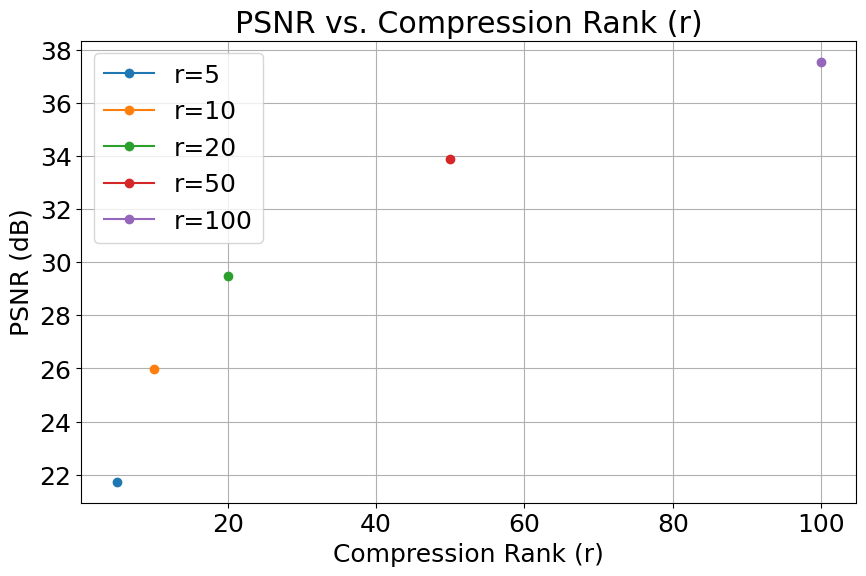

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio

def compress_svd(image, r):
    """
    Perform SVD-based compression on the input image.
    """
    U, Sigma, Vt = svd(image, full_matrices=False)
    compressed_image = np.dot(U[:, :r], np.dot(np.diag(Sigma[:r]), Vt[:r, :]))
    return compressed_image

def calculate_psnr(original, compressed):
    """
    Calculate PSNR between the original and compressed images.
    """
    max_pixel_value = 255.0
    mse = np.mean((original - compressed) ** 2)
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
    return psnr

def main():
    # Load the image
    original_image = io.imread("pic.jpg")
    
    # Convert the image to grayscale
    gray_image = color.rgb2gray(original_image)

    # Set different values of r (rank) for compression
    r_values = [5, 10, 20, 50, 100]

    # Plot PSNR for different values of r
    plt.figure(figsize=(10, 6))

    for r in r_values:
        compressed_image = compress_svd(gray_image, r)
        psnr_value = peak_signal_noise_ratio(gray_image, compressed_image)
        plt.plot(r, psnr_value, marker='o', label=f'r={r}')

    plt.title('PSNR vs. Compression Rank (r)')
    plt.xlabel('Compression Rank (r)')
    plt.ylabel('PSNR (dB)')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


C:\Users\RGS-CO\AppData\Local\Temp\ipykernel_6544\596891340.py:51: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = peak_signal_noise_ratio(gray_image, denoised_image)
C:\Users\RGS-CO\AppData\Local\Temp\ipykernel_6544\596891340.py:67: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = peak_signal_noise_ratio(gray_image, denoised_image)


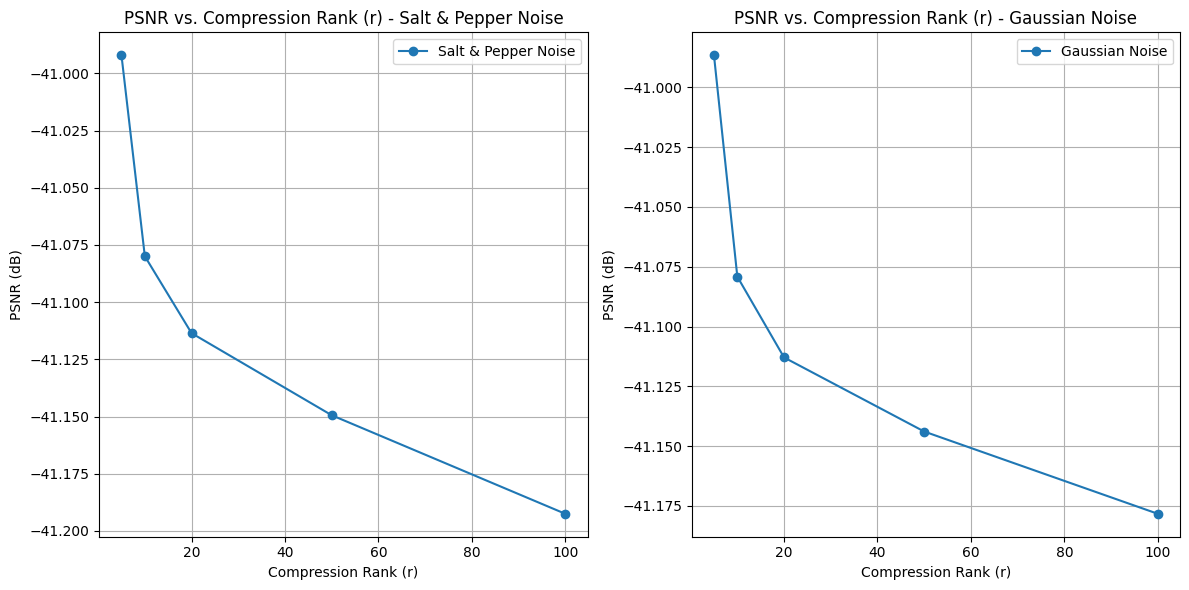

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from skimage import io, color, util
from skimage.metrics import peak_signal_noise_ratio

def compress_svd(image, r):
    """
    Perform SVD-based compression on the input image.
    """
    U, Sigma, Vt = svd(image, full_matrices=False)
    compressed_image = np.dot(U[:, :r], np.dot(np.diag(Sigma[:r]), Vt[:r, :]))
    return compressed_image

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = util.random_noise(image, mode='s&p', amount=salt_prob + pepper_prob, salt_vs_pepper=salt_prob / (salt_prob + pepper_prob))
    return util.img_as_ubyte(noisy_image)

def add_gaussian_noise(image, sigma):
    noisy_image = util.random_noise(image, mode='gaussian', var=sigma**2)
    return util.img_as_ubyte(noisy_image)

def main():
    # Load the image
    original_image = io.imread("pic.jpg")
    
    # Convert the image to grayscale
    gray_image = color.rgb2gray(original_image)

    # Define noise parameters
    salt_prob = 0.02
    pepper_prob = 0.02
    gaussian_sigma = 0.1

    # Add salt and pepper noise
    noisy_salt_pepper = add_salt_and_pepper_noise(gray_image, salt_prob, pepper_prob)

    # Add Gaussian noise
    noisy_gaussian = add_gaussian_noise(gray_image, gaussian_sigma)

    # Set different values of r (rank) for compression
    r_values = [5, 10, 20, 50, 100]

    # Plot PSNR for different values of r for salt and pepper noise
    plt.figure(figsize=(12, 6))

    psnr_values_salt_pepper = []

    for r in r_values:
        denoised_image = compress_svd(noisy_salt_pepper, r)
        psnr_value = peak_signal_noise_ratio(gray_image, denoised_image)
        psnr_values_salt_pepper.append(psnr_value)

    plt.subplot(1, 2, 1)
    plt.plot(r_values, psnr_values_salt_pepper, marker='o', label='Salt & Pepper Noise')
    plt.title('PSNR vs. Compression Rank (r) - Salt & Pepper Noise')
    plt.xlabel('Compression Rank (r)')
    plt.ylabel('PSNR (dB)')
    plt.legend()
    plt.grid(True)

    # Plot PSNR for different values of r for Gaussian noise
    psnr_values_gaussian = []

    for r in r_values:
        denoised_image = compress_svd(noisy_gaussian, r)
        psnr_value = peak_signal_noise_ratio(gray_image, denoised_image)
        psnr_values_gaussian.append(psnr_value)

    plt.subplot(1, 2, 2)
    plt.plot(r_values, psnr_values_gaussian, marker='o', label='Gaussian Noise')
    plt.title('PSNR vs. Compression Rank (r) - Gaussian Noise')
    plt.xlabel('Compression Rank (r)')
    plt.ylabel('PSNR (dB)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

### Import Dataset

In [6]:
Datapoint = pd.read_csv('Datapoint.csv')


### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

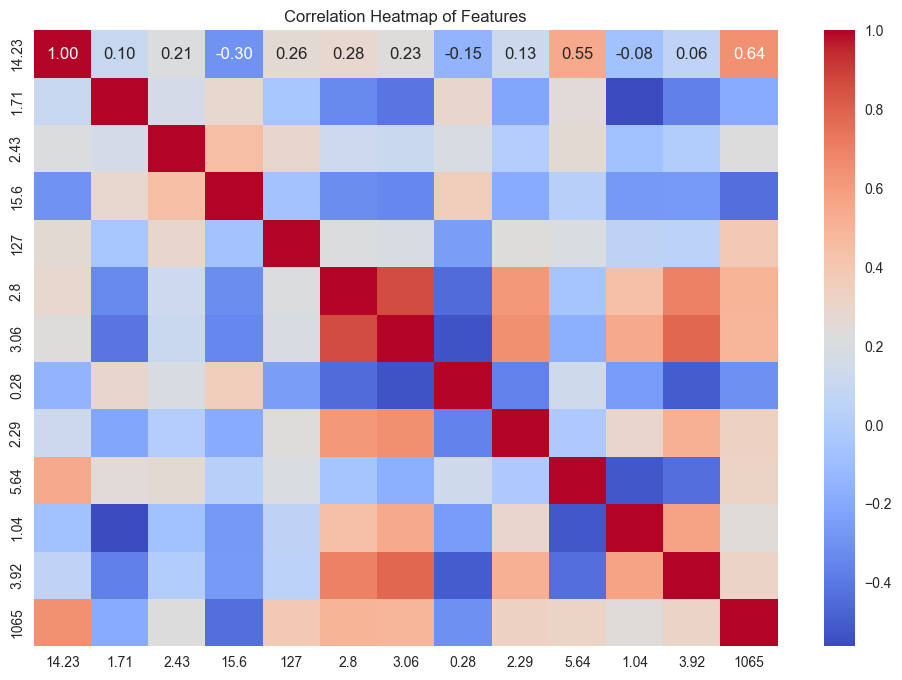

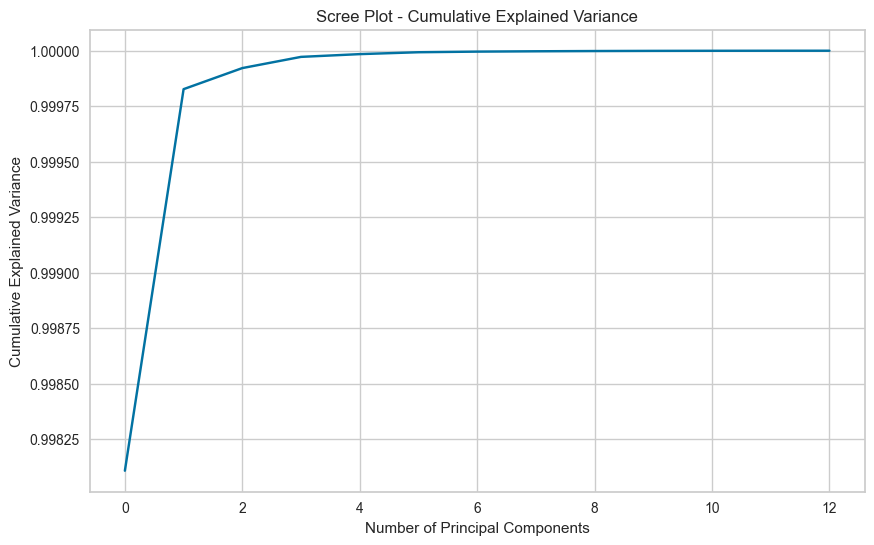

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load your data into a DataFrame, replace 'Datapoint.xlsx' with your actual Excel file
datapoint_dataframe = pd.read_csv('Datapoint.csv')

# Step 1: Calculate the correlation matrix
correlation_matrix = datapoint_dataframe.corr()

# Step 2: Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

# Step 3: Perform PCA
pca = PCA()
principal_components = pca.fit_transform(datapoint_dataframe)

# Step 4: Plot the scree plot or cumulative explained variance plot
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.grid(True)
plt.show()


###  Data Preprocessing

In [13]:
Datapoint.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

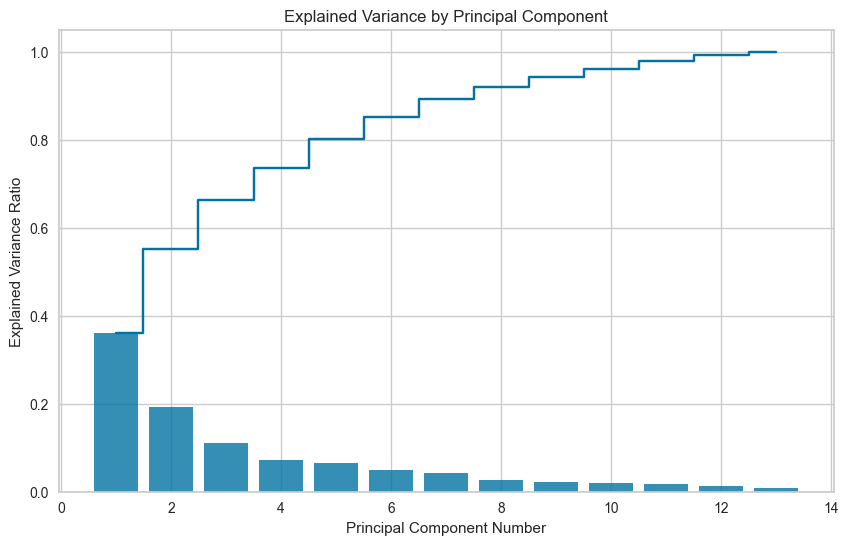

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your data into a DataFrame, replace 'Datapoint.csv' with your actual CSV file
datapoint_dataframe = pd.read_csv('Datapoint.csv')

# Separate features (X) and target (y) if applicable
# Assuming all columns are features for this example
X = datapoint_dataframe

# Step 1: Standardize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA on the standardized data
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Step 3: Plot the explained variance by each component
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.show()


Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a DataFrame, replace 'Datapoint.csv' with your actual CSV file
datapoint_dataframe = pd.read_csv('Datapoint.csv')

# Separate features (X) and target (y) if applicable
# Assuming all columns are features for this example
X = datapoint_dataframe.values

# Step 1: Standardize the data using StandardScaler
mean_values = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean_values) / std_dev

# Step 2: Calculate the covariance matrix
covariance_matrix = np.cov(X_standardized, rowvar=False)

# Step 3: Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 4: Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Choose the number of components based on the explained variance plot
num_components = 3  # Replace with the number you guessed

# Step 6: Select the top components
top_components = eigenvectors[:, :num_components]

# Step 7: Transform the data to the reduced feature space
X_reduced = X_standardized.dot(top_components)

# Now, X_reduced contains the data with reduced features

# Optionally, you can convert X_reduced back to the original space if needed
X_original_space = X_reduced.dot(top_components.T)
X_original_space = X_original_space * std_dev + mean_values


### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

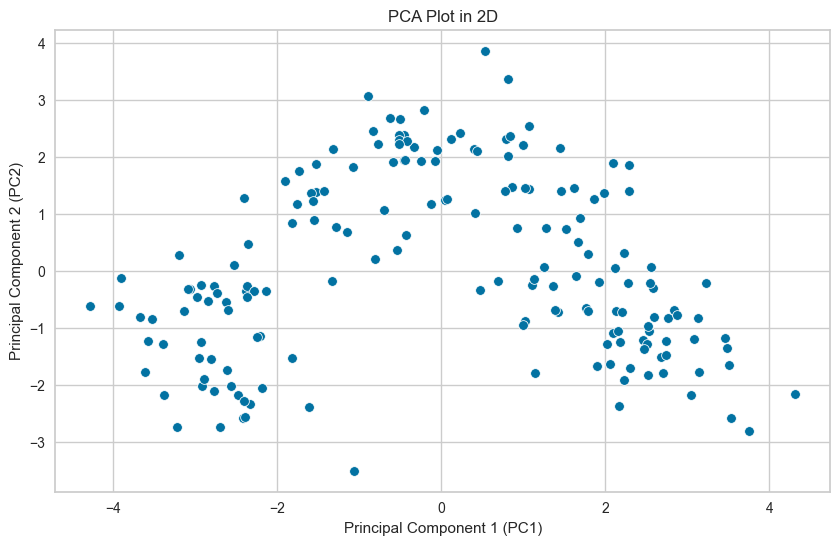

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your data into a DataFrame, replace 'Datapoint.csv' with your actual CSV file
datapoint_dataframe = pd.read_csv('Datapoint.csv')

# Separate features (X) and target (y) if applicable
# Assuming all columns are features for this example
X = datapoint_dataframe.values

# Step 1: Standardize the data using StandardScaler
mean_values = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean_values) / std_dev

# Step 2: Perform PCA on the standardized data
pca = PCA()
principal_components = pca.fit_transform(X_standardized)

# Choose the number of components based on the explained variance plot
num_components = 2
top_components = principal_components[:, :num_components]

# Create a DataFrame for the reduced features
reduced_df = pd.DataFrame(data=top_components, columns=['PC1', 'PC2'])

# Plot data points in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=reduced_df)
plt.title('PCA Plot in 2D')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()


### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




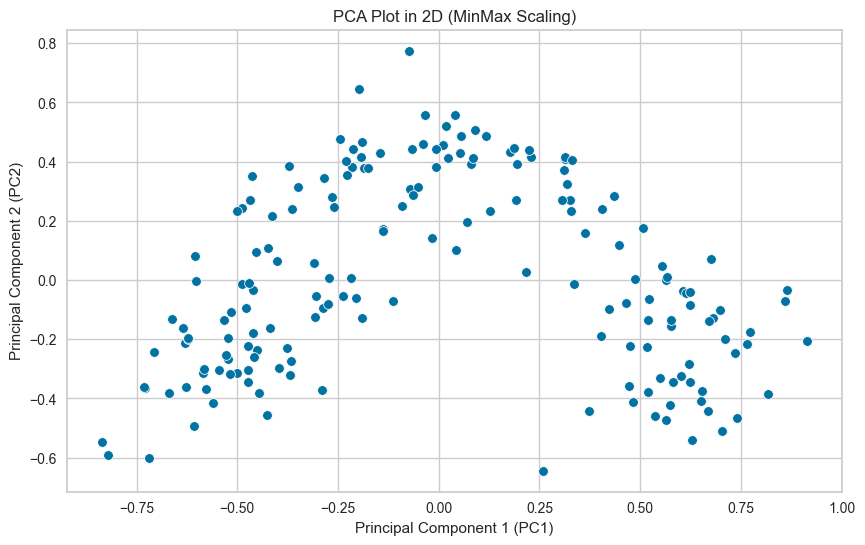

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load your data into a DataFrame, replace 'Datapoint.csv' with your actual CSV file
datapoint_dataframe = pd.read_csv('Datapoint.csv')

# Separate features (X) and target (y) if applicable
# Assuming all columns are features for this example
X = datapoint_dataframe.values

# Step 1: MinMax Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA on the scaled data
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Choose the number of components based on the explained variance plot
num_components = 2
top_components = principal_components[:, :num_components]

# Create a DataFrame for the reduced features
reduced_df = pd.DataFrame(data=top_components, columns=['PC1', 'PC2'])

# Plot data points in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=reduced_df)
plt.title('PCA Plot in 2D (MinMax Scaling)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()


### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

c:\Users\RGS-CO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RGS-CO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RGS-CO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RGS-CO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

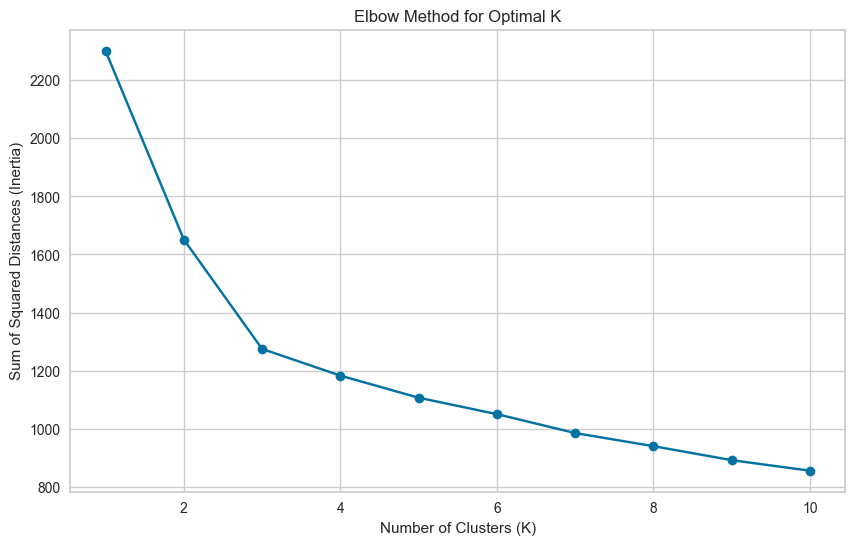

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your data into a DataFrame, replace 'Datapoint.csv' with your actual CSV file
datapoint_dataframe = pd.read_csv('Datapoint.csv')

# Separate features (X) and target (y) if applicable
# Assuming all columns are features for this example
X = datapoint_dataframe.values

# Step 1: Standardize the data using StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Step 2: Find the optimal number of clusters (K) using the elbow method
inertia_values = []
k_values = range(1, 11)  # You can adjust the range based on your expectations

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_standardized)
    inertia_values.append(kmeans.inertia_)

# Step 3: Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()


What is inertia and silhouette metrics?
Explain them briefly.




100%|██████████| 8/8 [00:00<00:00, 37.40it/s]


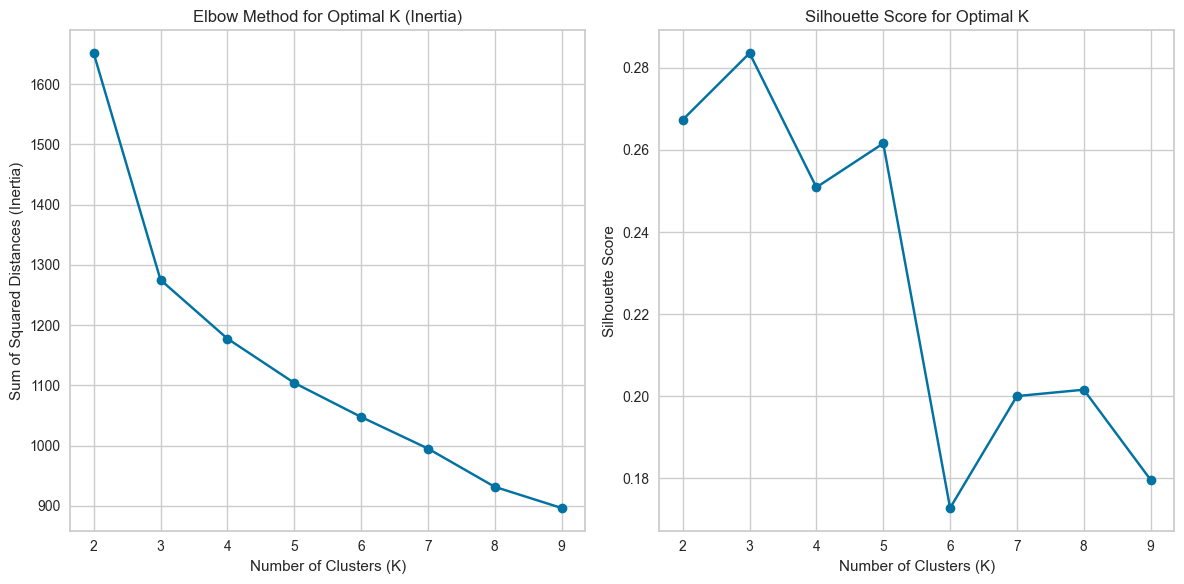

In [51]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load your data into a DataFrame, replace 'Datapoint.csv' with your actual CSV file
datapoint_dataframe = pd.read_csv('Datapoint.csv')

# Separate features (X) and target (y) if applicable
# Assuming all columns are features for this example
X = datapoint_dataframe.values

# Step 1: Standardize the data using StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Step 2: Perform PCA on the standardized data
pca = PCA()
pca_datapoint = pca.fit_transform(X_standardized)

# Step 3: Find the optimal number of clusters (K) using the elbow method
inertia = []
silhouette_scores = []

for i in tqdm(range(2, 10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_datapoint)
    
    # Append negative of the score (inertia)
    inertia.append(-kmeans.score(pca_datapoint))
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(pca_datapoint, kmeans.labels_))

# Plot the Elbow Curve
plt.figure(figsize=(12, 6))

# Plot Inertia
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K (Inertia)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [53]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Load your data into a DataFrame, replace 'Datapoint.csv' with your actual CSV file
datapoint_dataframe = pd.read_csv('Datapoint.csv')

# Separate features (X) and target (y) if applicable
# Assuming all columns are features for this example
X = datapoint_dataframe.values

# Step 1: Standardize the data using StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Step 2: Perform PCA on the standardized data
pca = PCA()
pca_std_datapoint = pca.fit_transform(X_standardized)

# Calculate silhouette scores for different numbers of clusters
silhouette = {}

for i in tqdm(range(2, 10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = silhouette_score(pca_std_datapoint, kmeans.labels_, metric='euclidean')

# Print or use the silhouette scores as needed
print(silhouette)


100%|██████████| 8/8 [00:00<00:00, 44.62it/s]

{2: 0.2673593122478238, 3: 0.28358063649484017, 4: 0.25089528482438883, 5: 0.26159108526606184, 6: 0.1727717974007013, 7: 0.20003659149735661, 8: 0.20158565670188588, 9: 0.1796347413628267}


Plot the **inertia** and **silhouette ** values

100%|██████████| 8/8 [00:00<00:00, 42.06it/s]


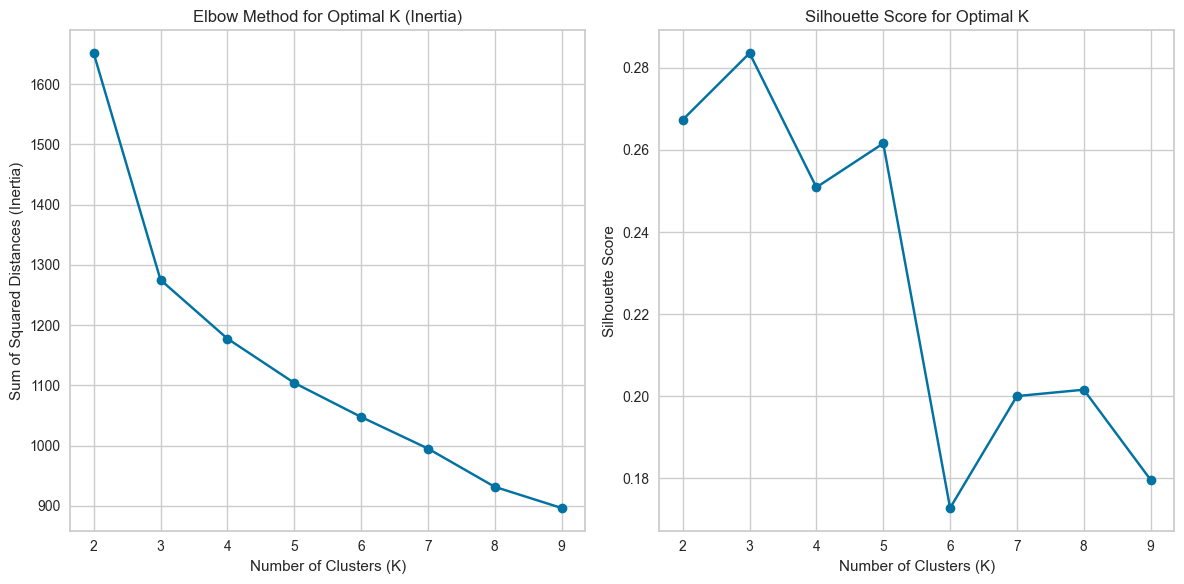

In [55]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load your data into a DataFrame, replace 'Datapoint.csv' with your actual CSV file
datapoint_dataframe = pd.read_csv('Datapoint.csv')

# Separate features (X) and target (y) if applicable
# Assuming all columns are features for this example
X = datapoint_dataframe.values

# Step 1: Standardize the data using StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Step 2: Perform PCA on the standardized data
pca = PCA()
pca_std_datapoint = pca.fit_transform(X_standardized)

# Calculate inertia and silhouette scores for different numbers of clusters
inertia = []
silhouette = {}

for i in tqdm(range(2, 10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    
    # Append negative of the score (inertia)
    inertia.append(-kmeans.score(pca_std_datapoint))
    
    # Calculate silhouette score
    silhouette[i] = silhouette_score(pca_std_datapoint, kmeans.labels_, metric='euclidean')

# Plot the Elbow Curve and Silhouette Score
plt.figure(figsize=(12, 6))

# Plot Inertia
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K (Inertia)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(list(silhouette.keys()), list(silhouette.values()), marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


Tune the hyper parameters based on your conclusions.

In [56]:
# Optimal number of clusters based on your analysis
optimal_k = 4

# Apply KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', n_init=15, max_iter=500, random_state=17)
kmeans_optimal.fit(pca_std_datapoint)

# Access cluster labels for your data points
cluster_labels = kmeans_optimal.labels_

# Print or use the cluster labels as needed
print(cluster_labels)


[1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 2 3 2 2 2 2 2 3 2 3 3
 2 2 2 2 3 2 2 2 0 3 2 2 3 2 2 2 2 2 3 3 1 3 2 3 3 2 2 3 2 2 2 2 2 2 3 3 2
 3 2 3 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

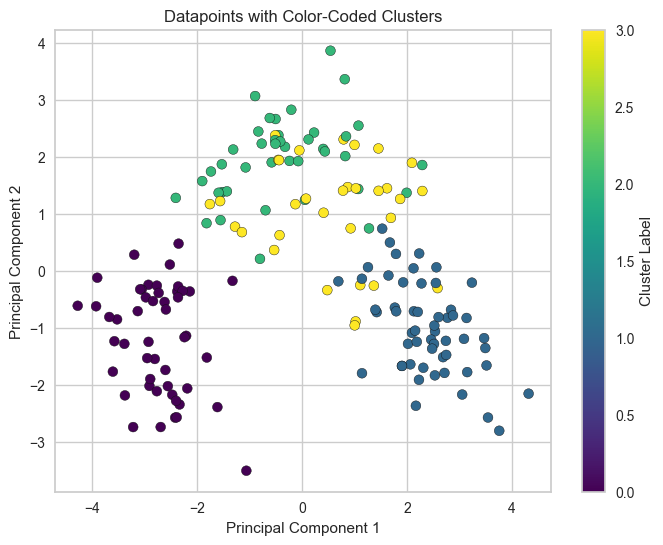

In [57]:
# Plot datapoints with color-coded clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Datapoints with Color-Coded Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


Do all previous steps for MinMax scaled data points.





100%|██████████| 8/8 [00:00<00:00, 40.08it/s]


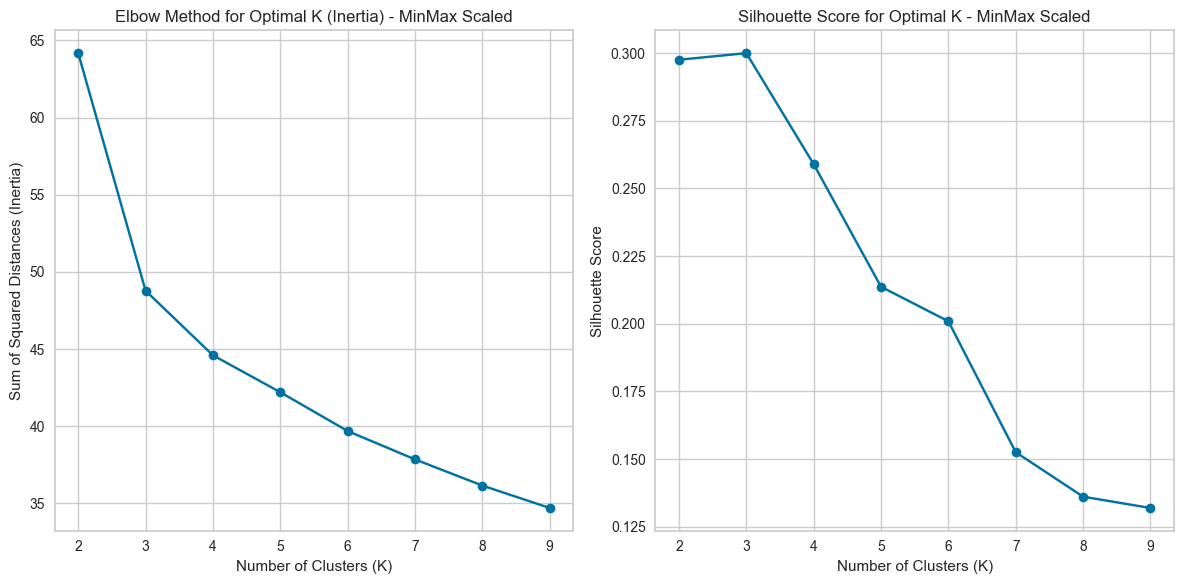

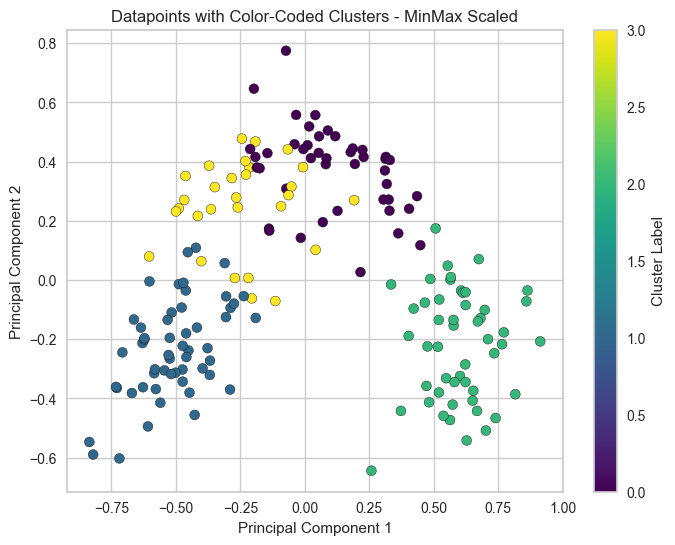

In [58]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load your data into a DataFrame, replace 'Datapoint.csv' with your actual CSV file
datapoint_dataframe = pd.read_csv('Datapoint.csv')

# Separate features (X) and target (y) if applicable
# Assuming all columns are features for this example
X = datapoint_dataframe.values

# Step 1: MinMax scaling
scaler = MinMaxScaler()
X_minmax_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA on the MinMax scaled data
pca = PCA()
pca_minmax_datapoint = pca.fit_transform(X_minmax_scaled)

# Calculate inertia and silhouette scores for different numbers of clusters
inertia_minmax = []
silhouette_minmax = {}

for i in tqdm(range(2, 10)):
    kmeans_minmax = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans_minmax.fit(pca_minmax_datapoint)
    
    # Append negative of the score (inertia)
    inertia_minmax.append(-kmeans_minmax.score(pca_minmax_datapoint))
    
    # Calculate silhouette score
    silhouette_minmax[i] = silhouette_score(pca_minmax_datapoint, kmeans_minmax.labels_, metric='euclidean')

# Plot the Elbow Curve and Silhouette Score for MinMax scaled data
plt.figure(figsize=(12, 6))

# Plot Inertia
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia_minmax, marker='o')
plt.title('Elbow Method for Optimal K (Inertia) - MinMax Scaled')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(list(silhouette_minmax.keys()), list(silhouette_minmax.values()), marker='o')
plt.title('Silhouette Score for Optimal K - MinMax Scaled')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Optimal number of clusters based on MinMax scaled data analysis
optimal_k_minmax = 4

# Apply KMeans with the optimal number of clusters for MinMax scaled data
kmeans_optimal_minmax = KMeans(n_clusters=optimal_k_minmax, init='k-means++', n_init=15, max_iter=500, random_state=17)
kmeans_optimal_minmax.fit(pca_minmax_datapoint)

# Access cluster labels for MinMax scaled data
cluster_labels_minmax = kmeans_optimal_minmax.labels_

# Plot datapoints with color-coded clusters for MinMax scaled data
plt.figure(figsize=(8, 6))
plt.scatter(pca_minmax_datapoint[:, 0], pca_minmax_datapoint[:, 1], c=cluster_labels_minmax, cmap='viridis', edgecolors='k', s=50)
plt.title('Datapoints with Color-Coded Clusters - MinMax Scaled')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


Compare the results of different scaling methods in a PCA problem